# Week 0: Introduction to Deep Learning Frameworks

## Notebook 1: MNIST Classification with a Dense Neural Network on Tensorflow2

Welcome to Applied AI study group! As a starter pack to the study group, you have three notebooks to get acquainted with the commonly used deep learning frameworks.

We will use Python together with Jupyter to go through all our notebooks. You can use the Python3 installed and available on your system, or you can go to the [python website](https://www.python.org/downloads/) to install Python3 to your system. Another alternative is to use [miniconda](https://docs.conda.io/en/latest/miniconda.html) to install python from scratch along with some useful packages.

## 0. Problem Definition

In all of the notebooks of this preparatory week, the problem we are trying to solve is **classification** using machine learning. More specifically, we have images and different categories. We are going to build models that will predict the category of a given image.

The dataset we are using in this notebook is [MNIST](http://yann.lecun.com/exdb/mnist/). This is a widely used classification dataset in computer vision and machine learning fields, consisting of handwritten digits from zero to nine. We will try to train a model that predicts the digit given an image.

## 1. Installation

To install Jupyter notebook on your system, you can run the following command to install with pip:

    pip install notebook
    
Or if you are using conda, you can run:

    conda install -c conda-forge notebook
    
Go to the directory where these notebooks are contained and run:

    jupyter notebook
    
to open up your notebooks and begin your adventure!

## 2. Imports and Checks

In this notebook, we are starting our journey of deep learning frameworks with [TensorFlow2](https://www.tensorflow.org). We first install TensorFlow2 using the official guidelines found [here](https://www.tensorflow.org/install).

The whole process usually boils down to running:

In [ ]:
%pip install tensorflow

After the installation is done, let's import tensorflow first:

In [1]:
import tensorflow as tf

Let's print the version and make sure that we are using the right version:

In [2]:
print(tf.__version__)

2.3.0


If you are seeing any version above >= 2.0.0, then you are good to go.

Below we are installing and importing a high level wrapper around `tf.data` named `tensorflow_datasets` to directly load datasets that are ready to be trained! We will only use this package to show the list of datasets available within `tf.data`:

In [2]:
%pip install tensorflow_datasets

  Using cached tensorflow_datasets-4.4.0-py3-none-any.whl (4.0 MB)
  Using cached tensorflow_metadata-1.5.0-py3-none-any.whl (48 kB)
  Using cached promise-2.3.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached dill-0.3.4-py2.py3-none-any.whl (86 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'd:\\anaconda3\\envs\\myenv001\\lib\\site-packages\\numpy-1.21.5.dist-info\\METADATA'



In [3]:
import tensorflow_datasets as tfds

In [4]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

Below we import the necessary libraries for data exploration and some further data operations. If any of these packages are not installed on your system, please install them via `pip` or `conda`:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 3. Data Preparation

We will use `tensorflow_datasets` to load the MNIST dataset. MNIST may be the most commonly used dataset in computer vision because of its simplicity. We are splitting the data as *train* and *test* sets and we are not using batching yet, so the `batch_size` parameter is -1.

In [6]:
mnist_training, mnist_test = tfds.load('mnist', split=['train', 'test'], batch_size=-1, as_supervised=True)                     

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  25%|██▌       | 1/4 [00:00<00:02,  1.45 url/s]

Dl Completed...:  50%|█████     | 2/4 [00:00<00:00,  2.77 url/s]

Dl Completed...:  75%|███████▌  | 3/4 [00:01<00:00,  1.74 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:05<00:00,  1.99s/ url]

Dl Completed...: 100%|██████████| 4/4 [00:06<00:00,  1.54s/ url]


Dataset mnist downloaded and prepared to C:\Users\pouya\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


Below we see a summary of the pixel values of the MNIST data:

In [7]:
print(mnist_training)

(<tf.Tensor: shape=(60000, 28, 28, 1), dtype=uint8, numpy=
array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0

In [8]:
print(mnist_test)

(<tf.Tensor: shape=(10000, 28, 28, 1), dtype=uint8, numpy=
array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0

We get the images and labels separately to prepare for training:

In [9]:
mnist_training_images, mnist_training_labels = mnist_training[0], mnist_training[1]
mnist_test_images, mnist_test_labels = mnist_test[0], mnist_test[1]

As the next step, we print the shapes. MNIST contains $28 \times 28$ grayscale images. In addition, we have 60,000 training images and 10,000 test images.

In [10]:
print(mnist_training_images.shape)
print(mnist_training_labels.shape)

print(mnist_test_images.shape)
print(mnist_test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


Let's visualize the first training image using `matplotlib`:

tf.Tensor(4, shape=(), dtype=int64)


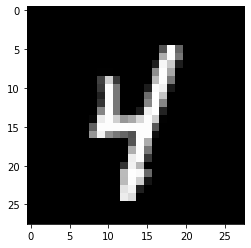

In [11]:
plt.imshow(mnist_training_images[0][:, :, 0] ,cmap = 'gray')
print(mnist_training_labels[0])

Let's also visualize the first test image:

tf.Tensor(2, shape=(), dtype=int64)


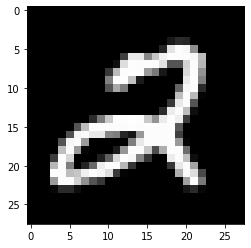

In [12]:
plt.imshow(mnist_test_images[0][:, :, 0] ,cmap = 'gray')
print(mnist_test_labels[0])

Next, we begin data preprocessing. We will use `tf.reshape` to change the shapes of the images into trainable vectors of size 784 (28 x 28). First we get the shapes separately:

In [13]:
num_training_images = mnist_training_images.shape[0]
num_test_images = mnist_test_images.shape[0]

img_width, img_height = mnist_training_images.shape[1], mnist_training_images.shape[2]

Since we are using a dense network, we *flatten* the images into vectors of $784 \times 1$:

In [14]:
mnist_training_images = tf.reshape(mnist_training_images, shape=(num_training_images, img_width * img_height))
mnist_test_images = tf.reshape(mnist_test_images, shape=(num_test_images, img_width * img_height))

Let's see if we actually changed the shape of the data:

In [15]:
print(mnist_training_images.shape)
print(mnist_test_images.shape)

(60000, 784)
(10000, 784)


Another preprocessing step is to normalize the data. As you already know from studying deep learning, normalization is a key step on preparing the data. MNIST pixels are normally between 0 and 255. We normalize the images by dividing each pixel to 255 to map the pixel values between 0 and 1.

Let's first look at the minimum and maximum values of the pixels and the labels.

Please note that we do not have to normalize the labels. However, we need to create one-hot vectors from label values. More on that in a short while:

In [16]:
print(np.amax(mnist_training_images[0]),np.amin(mnist_training_images[0]))
print(np.amax(mnist_test_images[0]),np.amin(mnist_test_images[0]))

print(np.amax(mnist_training_labels),np.amin(mnist_training_labels))
print(np.amax(mnist_test_labels),np.amin(mnist_test_labels))

255 0
255 0
9 0
9 0


We divide all the pixel values to 255.0 and cast them to type `tf.float32`. We also cast the label values into `tf.int64`.

In [17]:
def preprocess(x, y):
    x = tf.cast(x, tf.float32) / 255.0
    y = tf.cast(y, tf.int64)

    return x, y

We have to create one-hot vectors for the labels for the neural network to calculate the error. Below, we are creating the one-hot vectors and actually creating the dataset with the batch size 128:

In [18]:
def create_dataset(xs, ys, n_classes=10):
    ys = tf.one_hot(ys, depth=n_classes)
    
    return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

In [19]:
train_dataset = create_dataset(mnist_training_images, mnist_training_labels)
test_dataset = create_dataset(mnist_test_images, mnist_test_labels)

In [20]:
print(train_dataset)
train_dataset.element_spec    

<BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.int64)>


(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.int64, name=None))

Yay! We have our dataset now. Let's check the dataloader:

In [21]:
batch_images, batch_labels = next(iter(train_dataset))
print(batch_images.shape)
print(batch_labels.shape)
print(np.amax(batch_images[0]),np.amin(batch_images[0]))

(128, 784)
(128, 10)
1.0 0.0


Our data loader works like a charm. We have 128 vectors that are 784 dimensional as images, and 128 vectors that are 10 dimensional as labels.

Our maximum pixel value is 1 and the minimum is 0. Data is ready!

Let's visualize the first image in our batch:

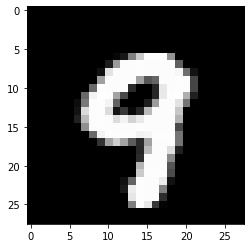

In [22]:
plt.imshow(tf.reshape(batch_images[0], shape=(img_width, img_height, 1))[:, :, 0] ,cmap = 'gray')

## 4. Model Creation

Let's define the hyperparameters of the model that we are going to use. We will create a three layer neural network consisting of dense layers. The `layer_neurons` variable below defines the sizes of the network.

In [23]:
input_shape = 784
label_shape = 10

lr = 0.003

layer_neurons = [
    [input_shape, 200],
    [200, 80],
    [80, label_shape],
]

bias_shapes = [200, 80, label_shape]
initializer = tf.initializers.glorot_uniform()

Below we define a function that creates a dense layer in TF2. It is simply multiplying the inputs and the weights, adds biases and passes the whole calculation from a sigmoid.

In [24]:
def dense_layer(inputs, weights, bias):
    return tf.nn.sigmoid(tf.matmul(inputs, weights) + bias)

Below we write functions to initialize the weights and biases:

In [25]:
def get_weight(shape, name):
    return tf.Variable(initializer(shape), name=name, trainable=True, dtype=tf.float32)

def get_bias(shape, name):
    return tf.Variable(initializer([shape]), name=name, trainable=True, dtype=tf.float32)

We define the weights and biases to be used in our model:

In [26]:
weights = []
bias = []
i = 0
for layer in layer_neurons:
    weights.append(get_weight(layer, 'weight{}'.format(i)))
    i+=1

i = 0
for layer in bias_shapes:
    bias.append(get_bias(layer, 'bias{}'.format(i)))
    i+=1


As an important step, we define the function that creates our whole neural network. As mentioned earlier, we have a three layer neural network:

In [27]:
def model(input):
    l1 = dense_layer(input, weights[0], bias[0])
    l2 = dense_layer(l1, weights[1], bias[1])
    l3 = dense_layer(l2, weights[2], bias[2])
    return l3

Below we define the optimizer and the loss function.

One thing to note here is that since we are using `softmax_cross_entropy_with_logits` as the loss function, we don't have to include a `softmax` layer into our model. The reason for this is that the `softmax_cross_entropy_with_logits` function already applies a softmax to the given inputs.

In [28]:
optimizer = tf.optimizers.Adam(lr)

def loss(pred, target):
    return tf.nn.softmax_cross_entropy_with_logits(target, pred)

We define one training step below. Note that we are using `tf.GradientTape` here for automatic differentiation. Therefore, we don't have to define the backward pass operations while creating the model.

In [29]:
def train_step(model, inputs, outputs, epoch):
    epoch_loss_avg = None
    
    with tf.GradientTape() as tape:
        current_loss = loss(model(inputs), outputs)
        grads = tape.gradient(current_loss, weights)
        optimizer.apply_gradients(zip(grads, weights))
    
    epoch_loss_avg = tf.reduce_mean(current_loss)
    
    return epoch_loss_avg

## 5. Training

Below we train our model for 10 epochs. We traverse over all training dataset.

Total loss is divided by number of iterations to get average loss for each batch:

In [30]:
num_epochs = 10
for epoch in range(num_epochs):
    epoch_loss = 0
    i = 0
    for train_data in train_dataset:
        batch_images, batch_labels = train_data
        iter_loss = train_step(model, batch_images, batch_labels, epoch)
        epoch_loss += iter_loss
        i+=1
    print("--- On epoch {} ---".format(epoch))
    tf.print("| Loss: ", epoch_loss/i)

--- On epoch 0 ---
| Loss:  1.63439703
--- On epoch 1 ---
| Loss:  1.51415622
--- On epoch 2 ---
| Loss:  1.49710321
--- On epoch 3 ---
| Loss:  1.48775077
--- On epoch 4 ---
| Loss:  1.48248851
--- On epoch 5 ---
| Loss:  1.4782939
--- On epoch 6 ---
| Loss:  1.47526622
--- On epoch 7 ---
| Loss:  1.47314143
--- On epoch 8 ---
| Loss:  1.47153115
--- On epoch 9 ---
| Loss:  1.47001731


## 6. Evaluation

We use the trained model over the test dataset and normalize with number of test samples to obtain the final accuracy:

In [31]:
acc = 0 
for test_data in test_dataset:
    batch_images, batch_labels = test_data
    predictions = model(batch_images)
    predictions = tf.nn.softmax(predictions)
    equality = tf.math.equal(np.argmax(predictions, axis=1), np.argmax(batch_labels, axis=1))
    acc += np.sum(equality)
acc /= 10000
print(acc)

0.9768


Congratulations on finishing this notebook! You can move on to the next one, which we are going to use PyTorch to classify MNIST examples.

**Bonus - Try to:**

- Get a test image
- Plot the image
- Make a model prediction on the image
- Print the predicted label and the actual label!